In [3]:
!ls 

data  model1_DNN5layer.py  model1.ipynb  out  pass_file.ipynb  README.md


# EE_chula Model_1
Implementation
<br>DNN = 5 layer<br>
hidden layer = 4 layer<br>
layer1 = 200 unit, activation = relu<br>
layer2 = 100 unit, activation = relu<br>
layer3 = 50 unit, activation = relu<br>
layer4 = 25 unit, activation = relu<br>
loss=mean_squared_error(MSE) = 0.0033954655623835163
# 7/28/2018

In [6]:
import os
import keras
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# load data for train

In [7]:
train = pd.read_csv('data/Train_data/dataset_rev4_train.csv')
#buffer datetime
buffer_datetime_train = train.datetime
#remove object
train = train.select_dtypes(exclude=['object'])
#replace misssing value
train.fillna(0,inplace=True)

# load data for test

In [9]:
test = pd.read_csv('data/test_data/dataset_rev4_test.csv')
#buffer datetime
buffer_datetime_test = test.datetime
#remove object
test = test.select_dtypes(exclude=['object'])
#replace misssing value
test.fillna(0,inplace=True)

In [11]:
print('dimension of train:', train.shape)
print('dimension of test:', test.shape)

dimension of train: (131586, 6)
dimension of test: (16147, 5)


In [12]:
print("features:",list(train.columns))

features: ['I', 'T', 'UV', 'WS', 'RH', 'P']


# remove outlier

In [13]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train)
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 13159
Number of rows without outliers: 118427


# Normalize

In [14]:
import warnings
warnings.filterwarnings('ignore')

col_train = list(train.columns)
col_train_bis = list(train.columns)

col_train_bis.remove('P')

mat_train = np.matrix(train)
mat_test  = np.matrix(test)

mat_new = np.matrix(train.drop('P',axis = 1))
mat_y = np.array(train.P).reshape((118427,1))

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y)

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_new)

train = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
test  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train_bis)

# create training_set and prediction_set

In [16]:
# List of features
COLUMNS = col_train #column train (x train)
FEATURES = col_train_bis  #column train-label (x test)
LABEL = "P"

# Columns
feature_cols = FEATURES #(x test)

# Training set and Prediction set with the features to predict
training_set = train[COLUMNS] #column train (x train)
prediction_set = train.P # column P

In [17]:
print(type(training_set))
print(type(prediction_set))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# create x_train and Test 

In [19]:
x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES] , prediction_set, test_size=0.33, random_state=42)

print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(79346, 5)
(39081, 5)
(79346,)
(39081,)


# create training_set

In [23]:
y_train = pd.DataFrame(y_train, columns = [LABEL])
training_set = pd.DataFrame(x_train, columns = FEATURES).merge(y_train, left_index = True, right_index = True)
training_sub = training_set[col_train]

# create testing_set

In [24]:
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(x_test, columns = FEATURES).merge(y_test, left_index = True, right_index = True)

# create model

In [28]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

seed = 7
np.random.seed(seed)

# Model
model = Sequential()
model.add(Dense(200, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adadelta())

feature_cols = training_set[FEATURES]
labels = training_set[LABEL].values

model.fit(np.array(feature_cols), np.array(labels), epochs=100, batch_size=10)

Epoch 1/100
79346/79346 [==============================] - 15s 184us/step - loss: 0.0047
Epoch 2/100
79346/79346 [==============================] - 14s 172us/step - loss: 0.0040
Epoch 3/100
79346/79346 [==============================] - 13s 165us/step - loss: 0.0039
Epoch 4/100
79346/79346 [==============================] - 14s 178us/step - loss: 0.0038
Epoch 5/100
79346/79346 [==============================] - 14s 177us/step - loss: 0.0038
Epoch 6/100
79346/79346 [==============================] - 14s 175us/step - loss: 0.0038
Epoch 7/100
79346/79346 [==============================] - 14s 173us/step - loss: 0.0037
Epoch 8/100
79346/79346 [==============================] - 15s 191us/step - loss: 0.0037
Epoch 9/100
79346/79346 [==============================] - 14s 171us/step - loss: 0.0037
Epoch 10/100
79346/79346 [==============================] - 13s 167us/step - loss: 0.0037
Epoch 11/100
79346/79346 [==============================] - 14s 176us/step - loss: 0.0037
Epoch 12/100
79346/

# Evaluation on the test set created by train_test_split

In [29]:
score = model.evaluate(np.array(feature_cols), np.array(labels))

79346/79346 [==============================] - 2s 28us/step


In [30]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 200)               1200      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 26        
Total params: 27,651
Trainable params: 27,651
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
score

0.0034322960238933435

# Predictions

In [34]:
feature_cols_test = testing_set[FEATURES]
labels_test = testing_set[LABEL].values

y = model.predict(np.array(feature_cols_test))
predictions = list(itertools.islice(y, testing_set.shape[0]))

# inverse_transform

In [35]:
predictions = prepro_y.inverse_transform(np.array(predictions).reshape(39081,1))

In [36]:
reality = pd.DataFrame(prepro.inverse_transform(testing_set), columns = [COLUMNS]).P

# Plot real vs predict

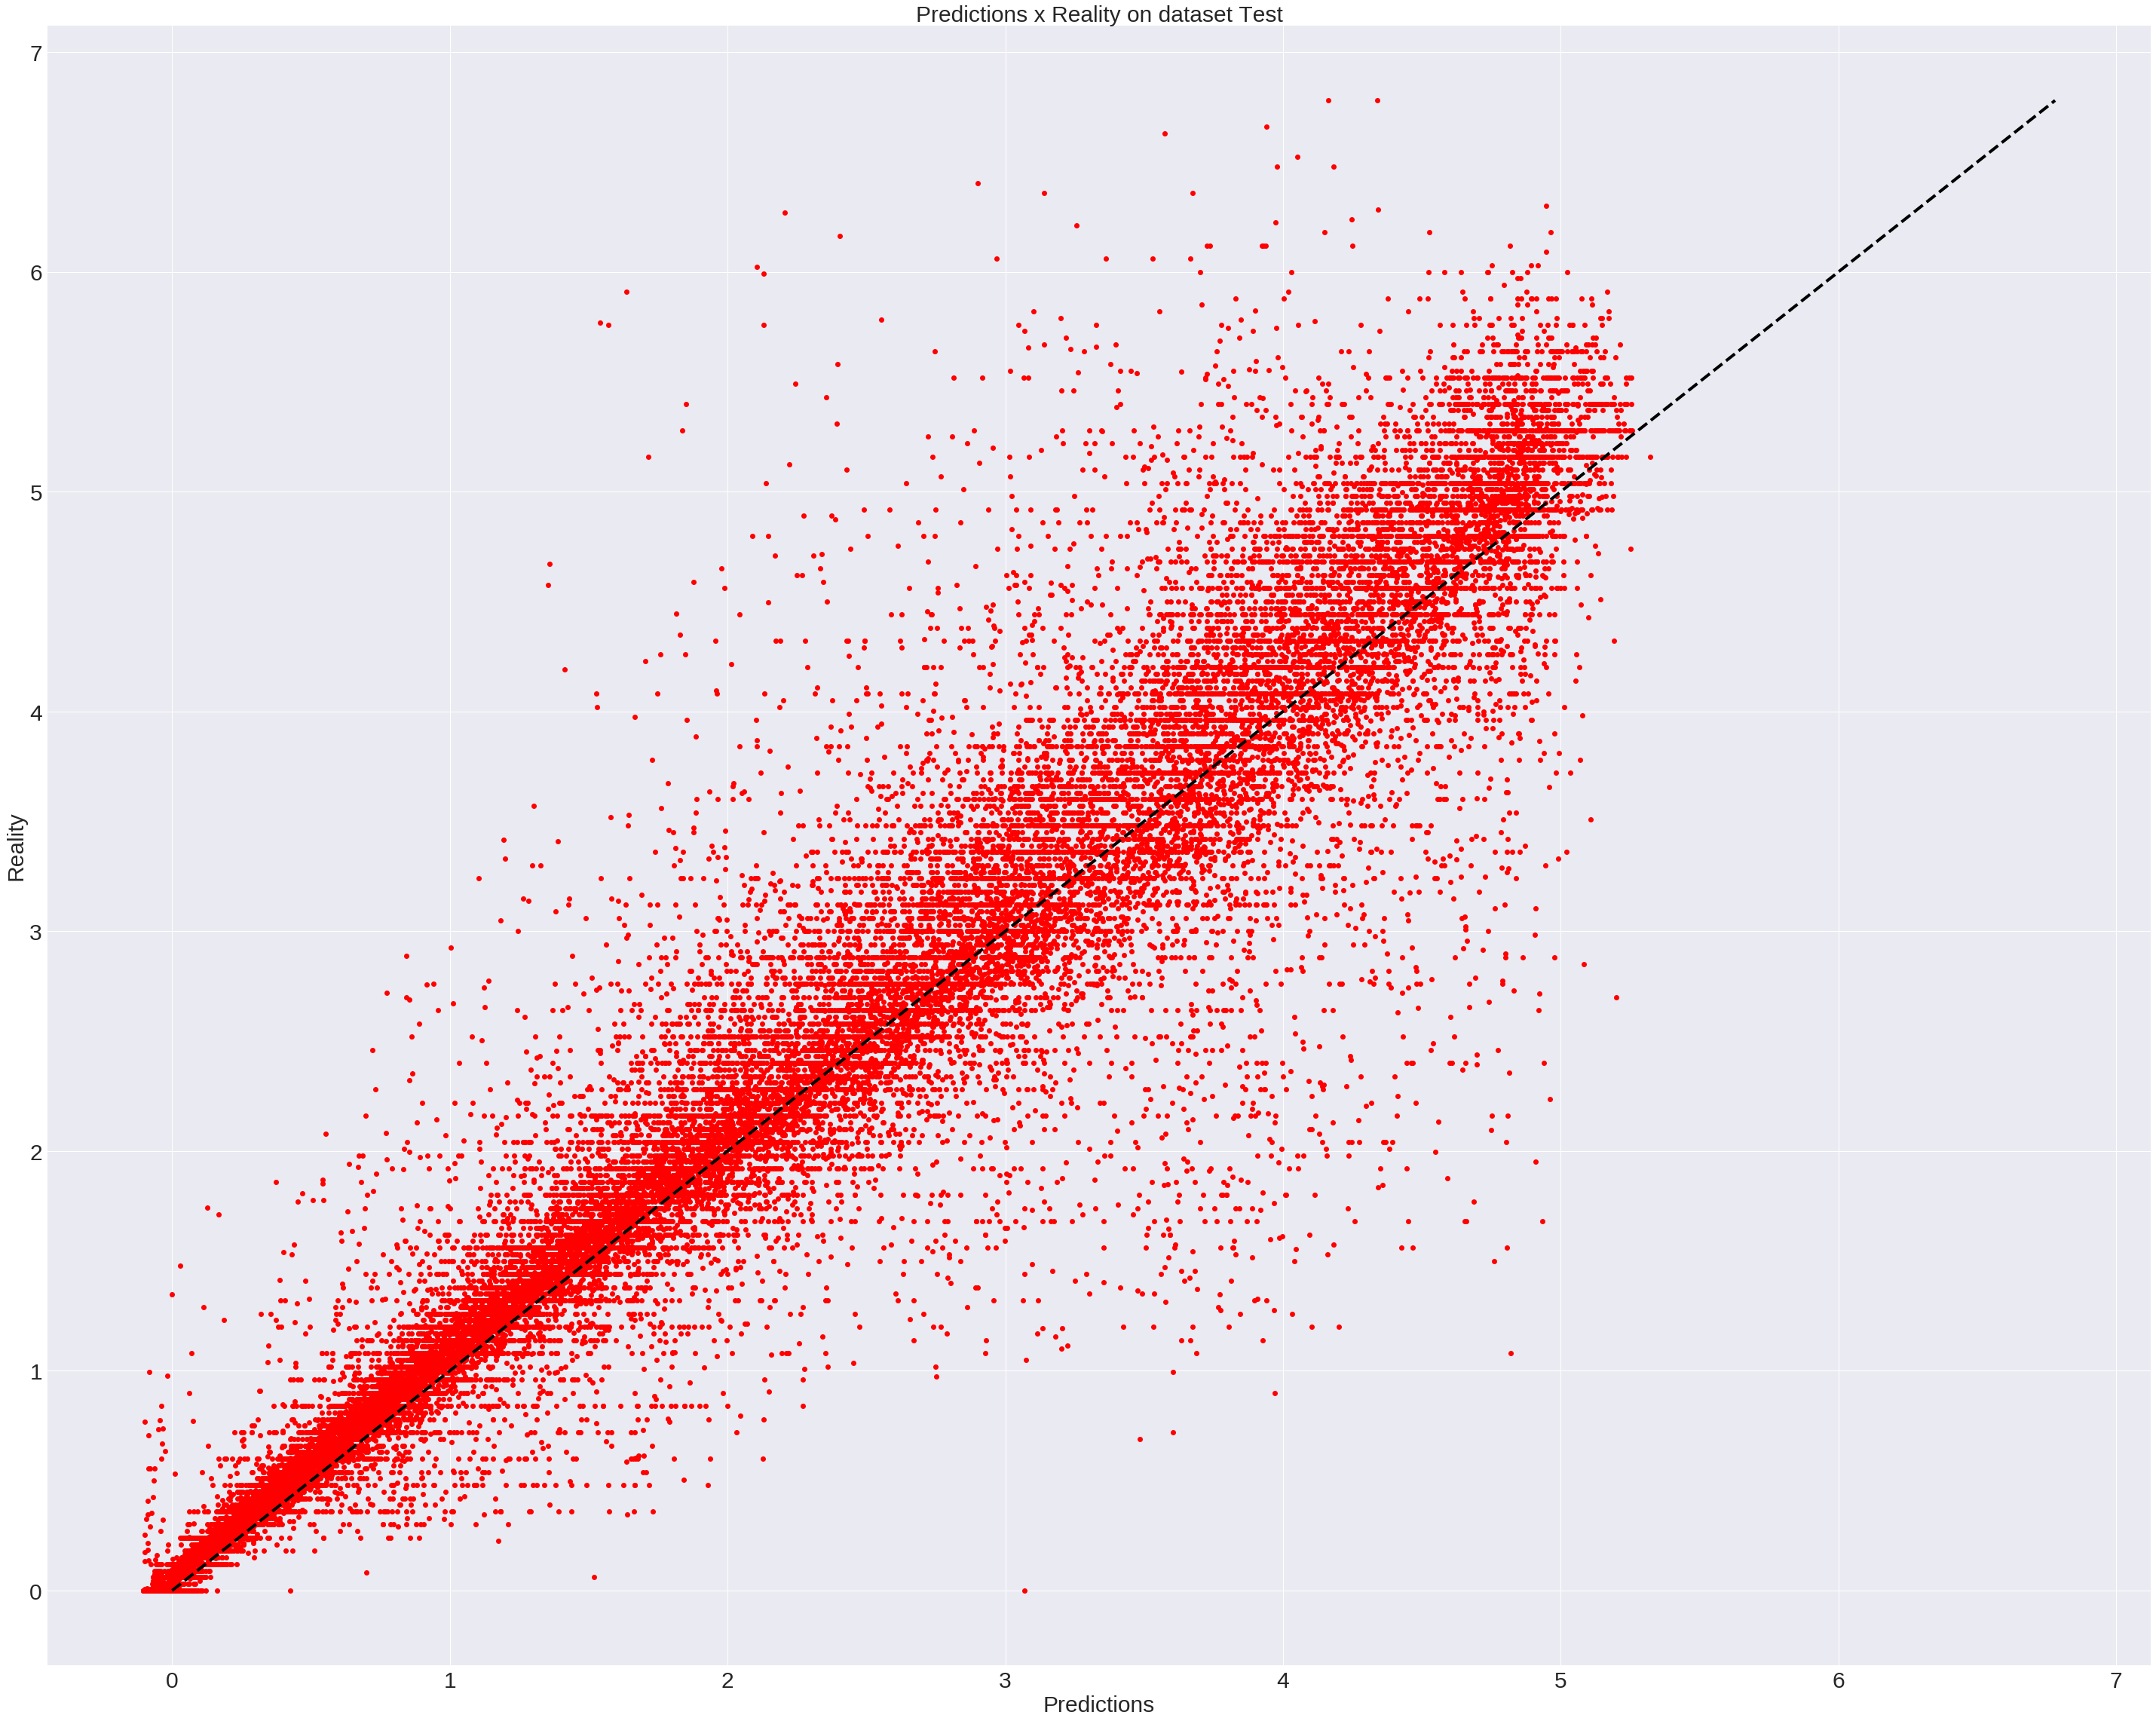

In [37]:
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(50, 40))

plt.style.use('ggplot')
plt.plot(predictions, reality.values, 'ro')
plt.xlabel('Predictions', fontsize = 30)
plt.ylabel('Reality', fontsize = 30)
plt.title('Predictions x Reality on dataset Test', fontsize = 30)
ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=4)
plt.show()

# Predict on unseen data

In [38]:
y_predict = model.predict(np.array(test))

def to_submit(pred_y,name_out):
    y_predict = list(itertools.islice(pred_y, test.shape[0]))
    y_predict = pd.DataFrame(prepro_y.inverse_transform(np.array(y_predict).reshape(len(y_predict),1)), columns = ['P'])
    y_predict = y_predict.join(buffer_datetime_test)
    y_predict.to_csv(name_out + '.csv',index=False)
    
to_submit(y_predict, "Predict_model1")